In [30]:
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

files = [
    '../tfhub_inception/processed_perf.tsv',
    '../tfhub_mobilenet/all/processed_perf.tsv',
    '../tfhub_nasnet/processed_perf.tsv',
    '../tfhub_resnet_152/processed_perf.tsv',
    '../SBU_resnet/processed_perf.csv'
]
labels = [
    'Inception V3',
    'MobileNet V2',
    'NasNet Large',
    'ResNet V2 152',
    'RestNet 50 (ft)'
]
data = {l: [] for l in labels}
averages = []

In [31]:
d = pd.read_csv(files[0], header=0, index_col=0, sep='\t')
v = d['EpitheliumF1'].values; averages.append(np.mean(v))
data[labels[0]] = d['EpitheliumF1'].values

d = pd.read_csv(files[1], header=0, index_col=0, sep='\t')
v = d['EpitheliumF1'].values; averages.append(np.mean(v))
data[labels[1]] = d['EpitheliumF1'].values

d = pd.read_csv(files[2], header=0, index_col=0, sep='\t')
v = d['EpitheliumF1'].values; averages.append(np.mean(v))
data[labels[2]] = d['EpitheliumF1'].values

d = pd.read_csv(files[3], header=0, index_col=0, sep='\t')
v = d['EpitheliumF1'].values; averages.append(np.mean(v))
data[labels[3]] = d['EpitheliumF1'].values

In [32]:
# This one is a slightly different format, the values are comparable
d = pd.read_csv(files[-1], header=0, index_col=0, sep=',')
v = d['epithelium_f1'].values; averages.append(np.mean(v))
data[labels[-1]] = d['epithelium_f1'].values

Text(0.5, 0, 'F1 Score')

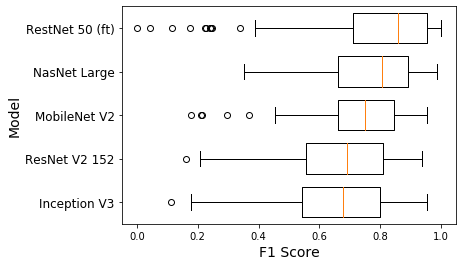

In [40]:
# Sort by the average F1 score
srt = np.argsort(averages)
srt_labels = np.array(labels)[srt]
_ = [plt.boxplot(data[l], positions=[i], vert=False, widths=0.7) for i,l in enumerate(srt_labels)]
plt.yticks(np.arange(0, len(labels)), srt_labels, fontsize=12)
plt.ylabel('Model', fontsize=14)
plt.xlabel('F1 Score', fontsize=14)